In [1]:
using SparseIR
using PyPlot

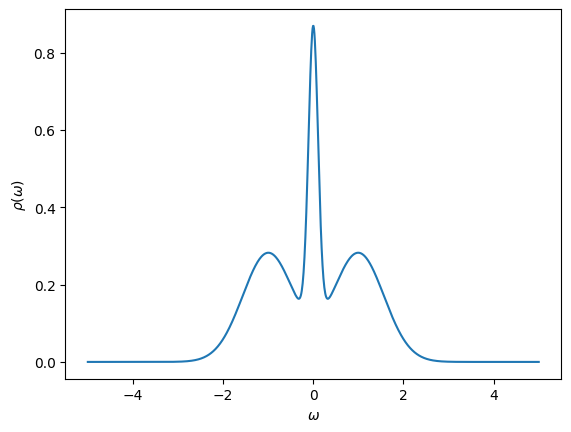

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x153407f06f70>

In [2]:
# Three Gaussian peaks (normalized to 1)
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)

rho(omega) = 0.2*gaussian(omega, 0.0, 0.15) + 
    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

#rho(omega) = gaussian(omega, 1.0, 0.3)
#    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

omegas = LinRange(-5, 5, 1000)
plt.xlabel(L"\omega")
plt.ylabel(L"\rho(\omega)")
plt.plot(omegas, rho.(omegas))

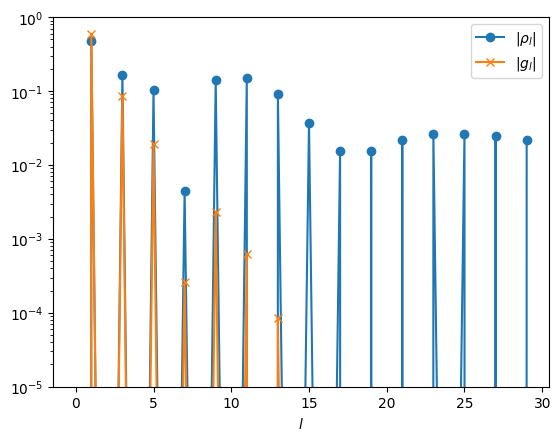

PyObject <matplotlib.legend.Legend object at 0x1533d598d9d0>

In [3]:
beta = 10
wmax = 10
IR_basis_set = FiniteTempBasisSet(beta, wmax, 1e-10)
#basis = FiniteTempBasis(fermion, beta, wmax, 1e-7)

rhol = [overlap(IR_basis_set.basis_f.v[l], rho) for l in 1:size(IR_basis_set.basis_f)]
gl = - IR_basis_set.basis_f.s .* rhol

plt.semilogy(abs.(rhol), marker="o", label=L"|\rho_l|")
plt.semilogy(abs.(gl), marker="x", label=L"|g_l|")
plt.xlabel(L"l")
plt.ylim([1e-5, 1])
plt.legend()

In [4]:
IR_basis_set.smpl_wn_f.sampling_points

32-element Vector{Int64}:
 -229
 -217
  -93
  -55
  -39
  -29
  -23
  -17
  -15
  -13
  -11
   -9
   -7
    ⋮
    9
   11
   13
   15
   17
   23
   29
   39
   55
   93
  217
  229

In [5]:
gw = evaluate(IR_basis_set.smpl_wn_f, gl)

32-element Vector{ComplexF64}:
 0.0005921781483218339 + 1.9132849767229442e-18im
  0.000659183972292615 + 3.801056439104969e-18im
   0.00352122362233151 + 6.965264496829267e-18im
  0.009684805691082182 - 4.9115086225122765e-18im
  0.018321132039764133 - 7.918072373705104e-18im
  0.031006468085399704 + 6.034904871635155e-18im
   0.04595417879476218 + 3.092573090912026e-18im
   0.07471239066415848 - 4.053565795898437e-18im
   0.09048381099649311 + 2.0052910672190617e-18im
   0.11179392974523875 - 1.0157060472347772e-17im
   0.14157011742829764 - 3.298476272215214e-18im
   0.18492325519072486 + 6.171984636851218e-18im
    0.2513534320508121 - 9.051908059570939e-18im
                       ⋮
   0.18492325519072486 - 6.171984636851218e-18im
   0.14157011742829764 + 3.298476272215214e-18im
   0.11179392974523875 + 1.0157060472347772e-17im
   0.09048381099649311 - 2.0052910672190617e-18im
   0.07471239066415848 + 4.053565795898437e-18im
   0.04595417879476218 - 3.092573090912026e-18im
  0.031

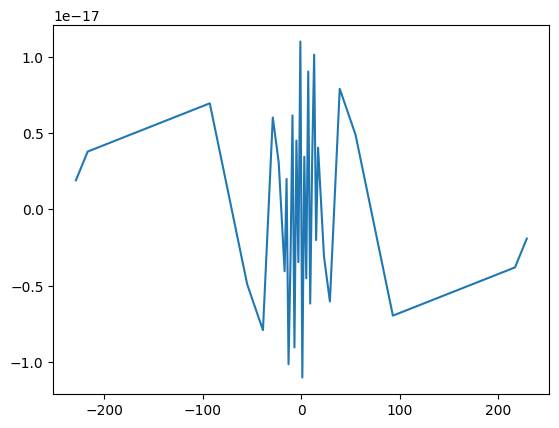

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1533ce8e33a0>

In [6]:
plt.plot(IR_basis_set.smpl_wn_f.sampling_points, imag(gw))

In [7]:
hnw = Int64(length(IR_basis_set.smpl_wn_f.sampling_points)/2)

16

In [8]:
gw[14]

0.3600574571112472 + 4.521102695701636e-18im

In [9]:
IR_basis_set.smpl_wn_f.sampling_points[26]

23

In [10]:
f = open( "green.dat", "w")
for iw in 1:hnw
    IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]
    omega = IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]*pi/beta
    green = gw[hnw+iw]
    println(f, "$omega \t $(real(green)) \t $(imag(green))")
end
close(f)